In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
url = "https://github.com/FazlullahBokhari/Datasets/blob/main/Churn_Modelling.csv?raw=true"

In [5]:
dataset = pd.read_csv(url)

In [6]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
# feature engineering 
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
X = X.drop(['Geography','Gender'],axis=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [15]:
X = pd.concat([X,geography,gender], axis=1)

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [18]:
# feature Scaling 

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
# Now lets create the ANN 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU 
from tensorflow.keras.layers import Dropout

In [22]:
# lets initialize the ANN 
classifier = Sequential()

In [23]:
# adding the input layer and first hidden layer
classifier.add(Dense(10, input_shape=(11,), activation='relu'))

In [24]:
classifier

In [25]:
# adding the first hidden layer 
classifier.add(Dense(units=10, activation='relu'))
classifier.add(Dropout(0.2))

In [26]:
# adding the second hidden layer 
classifier.add(Dense(units=10, activation='relu'))
classifier.add(Dropout(0.3))

In [27]:
# adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [28]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable pa

In [29]:
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Early stopping
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(

    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)

In [32]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4787 - accuracy: 0.7936 - val_loss: 0.4389 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 952us/step - loss: 0.4376 - accuracy: 0.8026 - val_loss: 0.4047 - val_accuracy: 0.8141
Epoch 3/1000
536/536 [==============================] - 1s 979us/step - loss: 0.4138 - accuracy: 0.8188 - val_loss: 0.4026 - val_accuracy: 0.8194
Epoch 4/1000
536/536 [==============================] - 1s 991us/step - loss: 0.4011 - accuracy: 0.8255 - val_loss: 0.3841 - val_accuracy: 0.8285
Epoch 5/1000
536/536 [==============================] - 1s 987us/step - loss: 0.3938 - accuracy: 0.8263 - val_loss: 0.3827 - val_accuracy: 0.8179
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3947 - accuracy: 0.8326 - val_loss: 0.3834 - val_accuracy: 0.8360
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3888 - accuracy: 0.8334 - val_loss: 0.3723 - val_a

In [33]:
model_history = classifier.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8465 - val_loss: 0.3410 - val_accuracy: 0.8610
Epoch 2/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3702 - accuracy: 0.8428 - val_loss: 0.3526 - val_accuracy: 0.8500
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3723 - accuracy: 0.8466 - val_loss: 0.3471 - val_accuracy: 0.8620
Epoch 4/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8470 - val_loss: 0.3573 - val_accuracy: 0.8540
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3673 - accuracy: 0.8486 - val_loss: 0.3412 - val_accuracy: 0.8590
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3710 - accuracy: 0.8466 - val_loss: 0.3445 - val_accuracy: 0.8550
Epoch 7/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3685 - accuracy: 0.8469 - val_loss: 0.3461 - val_accuracy:

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

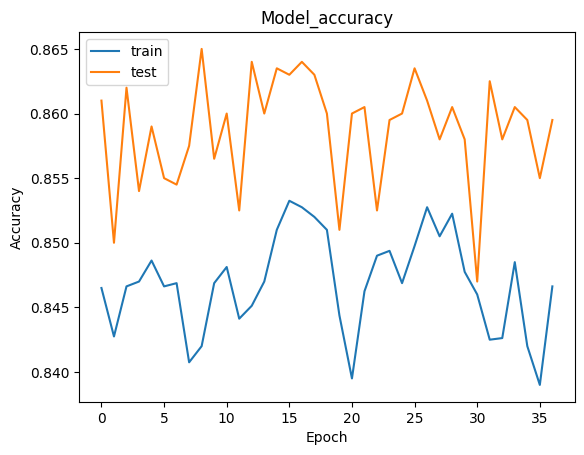

In [35]:
# summarize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

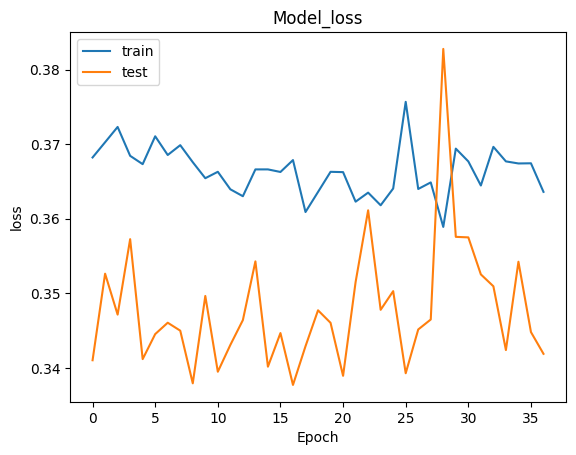

In [36]:
# summarize history for loss 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [37]:
# Making the predictions and evaluating the model 

#predicting the test set results 
y_pred = classifier.predict(X_test)
y_pred = (y_pred>= 0.5)

In [38]:
#Make the confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[1495,  100],
       [ 181,  224]], dtype=int64)

In [39]:
# calculate the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true=y_test, y_pred=y_pred)

In [40]:
score

0.8595

In [41]:
# get the weights 
classifier.get_weights()

[array([[-0.4271027 , -0.93986374,  1.1682422 , -0.29624143, -0.38468364,
          0.2854453 , -0.01003264, -0.13958792, -0.59241503,  1.2482499 ],
        [ 0.9821709 , -2.4395998 , -4.170827  , -0.5522487 , -3.604577  ,
         -1.693827  , -2.6963303 ,  3.284784  ,  1.7292053 , -1.5242531 ],
        [-0.27645928,  0.88000095, -0.45337936, -0.03636188,  0.11045747,
          0.12005169, -0.4880218 ,  0.5239311 , -0.36331284,  0.43571886],
        [ 2.9047031 , -3.0389524 ,  1.2539332 ,  0.50293577, -0.389955  ,
         -0.76339334, -2.1436038 , -0.71642834, -3.423645  , -0.6077378 ],
        [ 2.5282395 ,  1.309854  , -0.01169213,  5.1898284 ,  1.4645294 ,
         -0.08311021, -2.267085  , -0.0667311 , -4.0078464 ,  0.3729769 ],
        [ 0.50008774, -0.7427362 ,  1.0128601 , -0.14218098,  0.05348492,
          0.87169963,  0.8716653 ,  0.13406272,  0.2617439 ,  0.948907  ],
        [-0.65604866, -0.519023  ,  0.3663853 ,  0.21759365, -0.22801965,
          3.2728517 ,  0.1945788

In [42]:
classifier.save_weights('weights.h5')

In [43]:
classifier.save('model.h5')

In [44]:
from tensorflow.keras import models
classifier1 = models.load_model('model.h5')

In [45]:
classifier1.predict(X_test)

array([[0.18589312],
       [0.24119684],
       [0.14798033],
       ...,
       [0.17076638],
       [0.15940005],
       [0.16861609]], dtype=float32)

In [46]:
#Regression

In [47]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
# Divide the dataset into independent and dependent features
X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]
y = dataset.iloc[:,12]

In [50]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,0
9997,709,France,Female,36,7,0.00,1,0,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,1


In [51]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [52]:
# feature engineering 
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [53]:
X = X.drop(['Geography','Gender'],axis=1)

In [54]:
X = pd.concat([X,geography,gender], axis=1)

In [55]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [56]:
# feature Scaling 

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
# Now lets create the ANN 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU 
from tensorflow.keras.layers import Dropout

In [58]:
# lets initialize the ANN 
regressor = Sequential()

# adding the input layer and first hidden layer
regressor.add(Dense(10, input_shape=(11,), activation='relu'))

# adding the first hidden layer 
regressor.add(Dense(units=10, activation='relu'))
regressor.add(Dropout(0.2)) 

# adding the second hidden layer 
regressor.add(Dense(units=10, activation='relu'))
regressor.add(Dropout(0.3)) 

# adding output layer
regressor.add(Dense(1, activation='linear')) 

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable 

In [59]:
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01) 

regressor.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy']) 


In [60]:
import tensorflow 
mse = tensorflow.keras.losses.MeanSquaredError(
    name = 'mean_squared_error'
)
metrics = tensorflow.keras.metrics.MeanSquaredError(
    name = 'mean_squared_error', dtype=None
)

In [61]:
regressor.compile(optimizer=opt, loss=mse, metrics='mae')

In [62]:
# Early stopping
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(

    monitor = 'mae',
    patience = 20,
    
   
)

In [63]:
model_history = regressor.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
800/800 [==============================] - 1s 896us/step - loss: 6465395200.0000 - mae: 65460.1914 - val_loss: 3549297152.0000 - val_mae: 50922.5430
Epoch 2/1000
800/800 [==============================] - 1s 799us/step - loss: 4399378944.0000 - mae: 55111.8047 - val_loss: 3395176192.0000 - val_mae: 50035.8594
Epoch 3/1000
800/800 [==============================] - 1s 825us/step - loss: 4323656704.0000 - mae: 54961.0312 - val_loss: 3351068416.0000 - val_mae: 49821.5625
Epoch 4/1000
800/800 [==============================] - 1s 801us/step - loss: 4282695936.0000 - mae: 54641.5859 - val_loss: 3437917696.0000 - val_mae: 50282.7266
Epoch 5/1000
800/800 [==============================] - 1s 793us/step - loss: 4191431936.0000 - mae: 53982.9727 - val_loss: 3467820032.0000 - val_mae: 50431.4023
Epoch 6/1000
800/800 [==============================] - 1s 814us/step - loss: 4245762560.0000 - mae: 54484.4219 - val_loss: 3387578624.0000 - val_mae: 50024.0039
Epoch 7/1000
800/800 [======

In [64]:
regressor.predict(X_test)

array([[90954.75 ],
       [97001.85 ],
       [84817.81 ],
       ...,
       [92818.64 ],
       [89427.39 ],
       [91696.086]], dtype=float32)

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_true=y_test, y_pred=y_pred)

-3.020953535506038

In [67]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,-0.506242,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.506242,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,-0.506242,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
